### Let's first see how this dataset look like

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

reviews = pd.read_csv("data/fine_foods/sampled_fine_food_reviews.csv")
reviews.shape

(100000, 11)

In [30]:
reviews.head()

,Unnamed: 0,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,SummartAndText
0,0,151584,B000HTFEVE,A1BQEGGHCBCRRQ,0,0,5,1332806400,My second-favorite gluten-free granola,Bakery on Main's Extreme Fruit & Nut Granola h...,My second-favorite gluten-free granolaBakery o...
1,1,177982,B00099ZGFG,A2S3Z54BI73QIK,3,3,5,1197072000,Great lean snack - ostrich!,These meat snacks are fabulous and incredibly ...,Great lean snack - ostrich!These meat snacks a...
2,2,538490,B000E4ARCS,A3BX21NIPUDXS5,1,1,5,1291593600,"Great product, excellent flavor",I bought this jerky to satisfy a craving that ...,"Great product, excellent flavorI bought this j..."
3,3,212032,B000CNB4LE,A1KZJ2Q8PKRIU6,0,0,1,1281312000,What did they do???,This product was great in the TetraPak. Now i...,What did they do???This product was great in t...
4,4,197792,B0078Y6CN0,A2AZU4JHTWYRY5,0,0,4,1296950400,Guests tell me they love this coffee!,I'm allergic to coffee so I can't speak from p...,Guests tell me they love this coffee!I'm aller...


### Cool, let's see the value distribution of user rated scores (1 - 5 stars)

(array([ 9285.,  5235.,  7678., 13972., 63830.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <BarContainer object of 5 artists>)

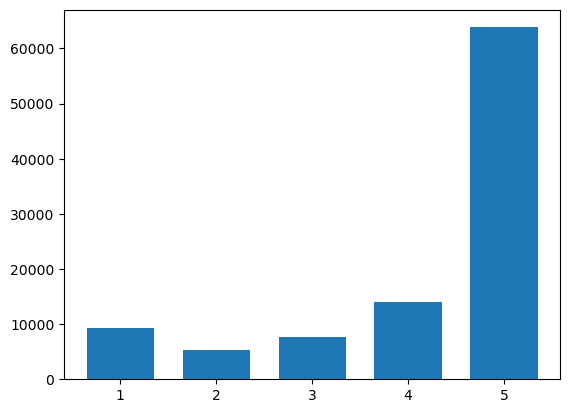

In [31]:
plt.hist(reviews['Score'], bins=5, range=(0.5, 5.5), rwidth=0.7)

### More than just the subjective ratings given by a user, we also want to see how others value each user's comment. Thus, let's filter the dataset to keep the reviews that have useful/notuseful votes

In [37]:
useful_reviews = reviews.loc[reviews['HelpfulnessDenominator'] != 0]
useful_reviews.shape

(52745, 11)

In [60]:
useful_reviews['HelpfulPortion'] = useful_reviews['HelpfulnessNumerator'] / useful_reviews['HelpfulnessDenominator']
useful_reviews.head()

/var/folders/k2/7hr6hcfd5v58p9nhhf_brbbm0000gn/T/ipykernel_35777/2821050564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_reviews['HelpfulPortion'] = useful_reviews['HelpfulnessNumerator'] / useful_reviews['HelpfulnessDenominator']


,Unnamed: 0,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,SummartAndText,HelpfulPortion
1,1,177982,B00099ZGFG,A2S3Z54BI73QIK,3,3,5,1197072000,Great lean snack - ostrich!,These meat snacks are fabulous and incredibly ...,Great lean snack - ostrich!These meat snacks a...,1.0
2,2,538490,B000E4ARCS,A3BX21NIPUDXS5,1,1,5,1291593600,"Great product, excellent flavor",I bought this jerky to satisfy a craving that ...,"Great product, excellent flavorI bought this j...",1.0
5,5,245284,B0029XDZKI,A2WC9NFLG57W4H,1,2,3,1266451200,Not the richest coffee or hazelnut flavor ehh...,I LOVE flavored coffee. I now drink it black w...,Not the richest coffee or hazelnut flavor ehh...,0.5
10,10,302292,B000GPRNGS,A33REC3J2JU2EL,1,2,5,1257552000,Yummy and Great Texture,I've been eating brown rice for the last coupl...,Yummy and Great TextureI've been eating brown ...,0.5
11,11,387921,B007RTR8UW,A2TBAUW2W7J538,0,1,5,1345680000,Love it!,"I don't have long hair, but love this conditio...","Love it!I don't have long hair, but love this ...",0.0


Text(0.5, 1.0, 'Useful votes vs. Total votes')

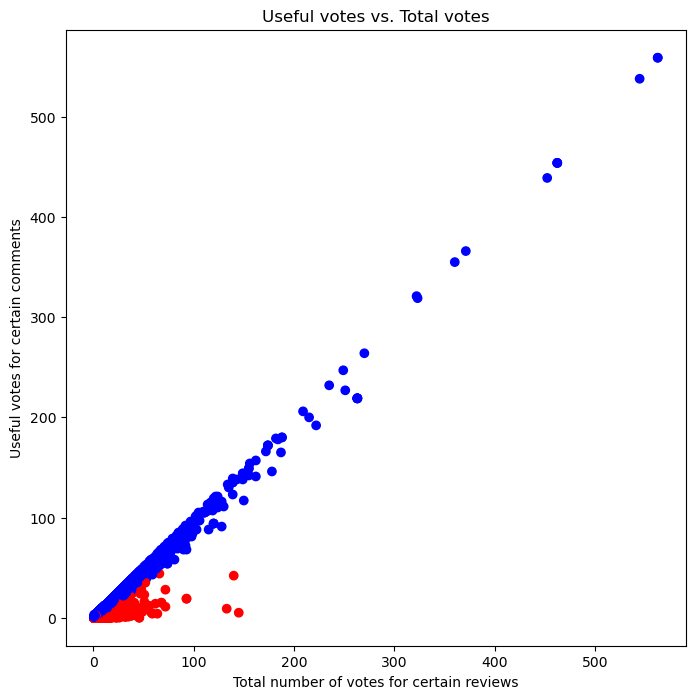

In [55]:
plt.figure(figsize=(8, 8))
plt.scatter(useful_reviews['HelpfulnessDenominator'], useful_reviews['HelpfulnessNumerator'], c=['red' if x < 0.7 else 'blue' for x in useful_reviews['HelpfulPortion']])
plt.ylabel('Useful votes for certain comments')
plt.xlabel('Total number of votes for certain reviews')
plt.title('Useful votes vs. Total votes')


We can see that most reviews that received votes have positive feedbacks, while some reviews have received less than 70% useful votes.

Let's see the content of an example among the 'outlier' examples

In [78]:
not_useful_reviews = useful_reviews.loc[(useful_reviews['HelpfulPortion'] < 0.3) & (useful_reviews['HelpfulnessDenominator'] > 15.0)]
not_useful_reviews

,Unnamed: 0,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,SummartAndText,HelpfulPortion
287,287,39098,B004I6BMWW,A3HXIIRWL92LID,3,38,5,1329004800,Based on beef being grass fed however . . .,the other ingredients are not so healthy and u...,Based on beef being grass fed however . . .the...,0.078947
534,534,207709,B00012182G,A3UOX55BPNUNHL,1,26,1,1348272000,PEOPLE!!!,THIS IS A RABBIT.<br /><br />THIS IS A DEAD RA...,PEOPLE!!!THIS IS A RABBIT.<br /><br />THIS IS ...,0.038462
672,672,444290,B000LKZ0R2,A32GZYO5BOKNIW,5,18,1,1297123200,CHOCK FULL OF MONSANTO GMO's,"I try NOT to eat GMO foods, which are genetica...",CHOCK FULL OF MONSANTO GMO'sI try NOT to eat G...,0.277778
1517,1517,155713,B0009VO58S,A3TJPSWY2HE4BS,1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...,NaN,0.041667
1853,1853,338519,B000W77S60,AT676YYI560,5,26,5,1182988800,5 Stars,"I haven't tried this product yet, but I am giv...","5 StarsI haven't tried this product yet, but I...",0.192308
...,...,...,...,...,...,...,...,...,...,...,...,...
98018,98018,292213,B000VK08OC,AFODIM6DTR994,3,16,3,1265155200,Medicinal Taste,i essentially wanted honey as a sugar substitu...,Medicinal Tastei essentially wanted honey as a...,0.187500
98416,98416,134236,B00120U5DY,A16MB0H009K4L9,1,19,1,1291248000,NO CUSTOMER SERVICE AT ALL!!!! IGNORE MY CANCE...,IDIOT. I TOLD YOU TWICE I WANT TO CANCEL THE O...,NO CUSTOMER SERVICE AT ALL!!!! IGNORE MY CANCE...,0.052632
98910,98910,72881,B000EF3FU8,A3PCQTKXYX17DG,0,16,2,1219017600,Yurgh!,"Tried the ""American Idol"" edition with printed...","Yurgh!Tried the ""American Idol"" edition with p...",0.000000
99098,99098,161064,B003OGKCDC,AODCU0S0TRYHL,3,30,1,1329955200,ripoff,First time buyer! Product arrived and I opene...,ripoffFirst time buyer! Product arrived and I...,0.100000


In [95]:
example1 = not_useful_reviews.loc[not_useful_reviews['UserId'] == 'AT676YYI560']
print('Total votes: {}, useful votes: {}'.format(example1['HelpfulnessDenominator'].values[0], example1['HelpfulnessNumerator'].values[0]))
print(example1['Summary'].values)
print(example1['Text'].values)

Total votes: 26, useful votes: 5
['5 Stars']
["I haven't tried this product yet, but I am giving this company 5 stars for their prompt and fast service!"]


This review is voted not useful most likely because it did not reflect information on the product quality

In [94]:
example2 = not_useful_reviews.loc[not_useful_reviews['UserId'] == 'A16MB0H009K4L9']
print('Total votes: {}, useful votes: {}'.format(example2['HelpfulnessDenominator'].values[0], example2['HelpfulnessNumerator'].values[0]))
print(example2['Summary'].values)
print(example2['Text'].values)

Total votes: 19, useful votes: 1
['NO CUSTOMER SERVICE AT ALL!!!! IGNORE MY CANCEL REQUEST!!']
['IDIOT. I TOLD YOU TWICE I WANT TO CANCEL THE ORDER. YOU BASICALLY JUST IGNORED MY REQUEST AND SENT ME THE ITEM.']


Totally capitalized, delievering strong negative emotion, and not reflecting enough information on the product itself

### What about the relationship between score and usefulness? Let's try a scatterplot again

Text(0.5, 1.0, 'Useful votes vs. Total votes')

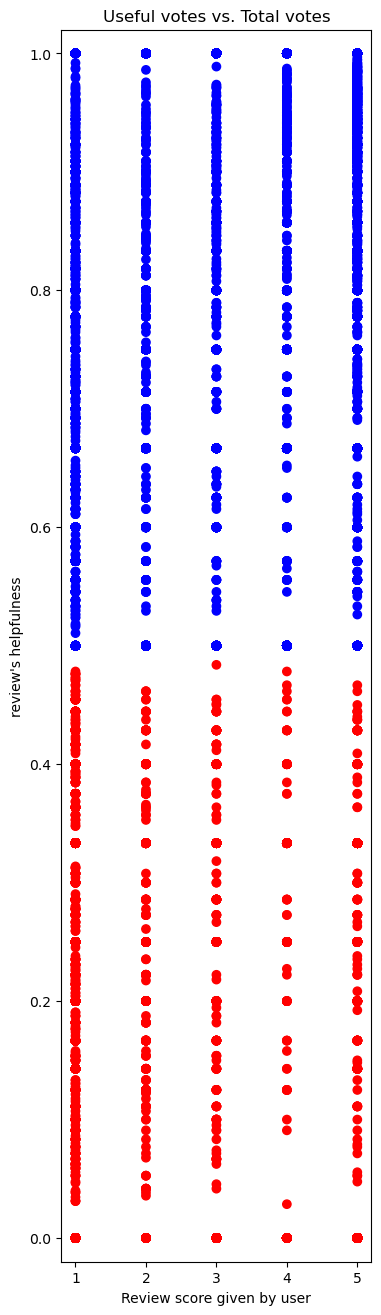

In [111]:
plt.figure(figsize=(4, 16))
plt.scatter(useful_reviews['Score'], useful_reviews['HelpfulPortion'], c=['red' if x < 0.5 else 'blue' for x in useful_reviews['HelpfulPortion']])
plt.ylabel('review\'s helpfulness')
plt.xlabel('Review score given by user')
plt.ylim((-0.02, 1.02))
plt.title('Useful votes vs. Total votes')


For user scores above 2, it seems like more people would vote 'useful' for that vote. For reviews that gave only score value of 1, the portion of other users who thinks this negative review is not useful increases a lot.